## Acquisition Analytics : Bank Marketing

We will understand the business objective and understand the data using univariate and multivariate analysis. Then we'll build multiple supervised learning models, choose the best among them and analyze the financial benefits of the analytics project.

- Data Understanding
- Data Cleaning
- Data Preparation
- Data Modelling
- Model Evaluation

The objective is to reduce the customer acquisition cost by targeting the ones who are likely to buy and to improve the response rate, i.e. the fraction of prospects who respond to the campaign.

### Data Understanding

The first step in solving any machine learning problem is data understanding. We will import the requisite libraries and apply univariate and multivariate analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv("bank_marketing.csv", sep=",")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

We can note that the dataset has 41188 data entries across 21 columns, one of them being the response (Target variable). Another thing to note is that there are no null values. That is, the dataset is completely clean.

In [4]:
# let's look at the first few rows of the dataframe
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Looking at all the column names
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'],
      dtype='object')

In [6]:
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

As we note that the response variable has 'yes' and 'no' responses, we will convert it to 1 and 0 respectively

In [7]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})

In [8]:
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [9]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [10]:
# Copy the dataset into a back up dataframe for future use

loan_copy = loan

In [11]:
# Determine the percentage of people who have bought the investment product, that is those who have the response varibale as 1

100*(loan['response'].sum()/loan['response'].count()).round(4)

11.27

### Exploratory Data Analysis

Now, we will do Exploratory Data Analysis on individual features and look for patterns.

First, we will look at the client data.

- Age
- Job : type of job
- Marital : marital status
- Education
- Default: has credit in default?
- Housing: has housing loan?
- Loan: has personal loan?

#### Age

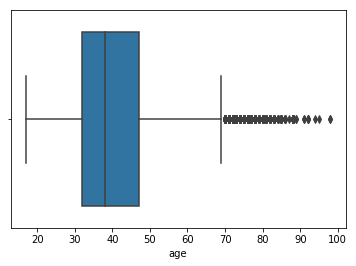

In [12]:
sns.boxplot(x='age', data=loan)
plt.show()

In [13]:
# Since there are a fair few data entries with age > 71, we will club all of those ages at 71 (since we can assume 
# that the behaviour will not change significantly with age at age above 70)

loan['age'][loan['age']>71] =71

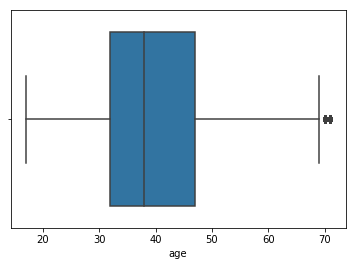

In [14]:
sns.boxplot(x='age', data=loan)
plt.show()

In [15]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [16]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')

In [17]:
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

In [18]:
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')

In [19]:
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [20]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",488,212,43.4
6,"(70.0, 80.0]",422,202,47.9


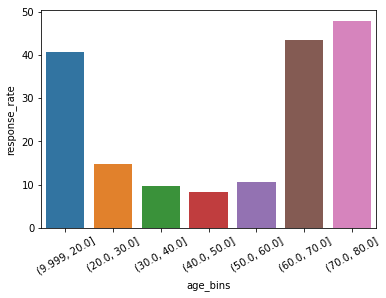

In [21]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [22]:
# Note that we have added a new column named age bucket to the table

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### Job

In [23]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [24]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')

In [25]:
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

In [26]:
agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')

In [27]:
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

In [28]:
agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


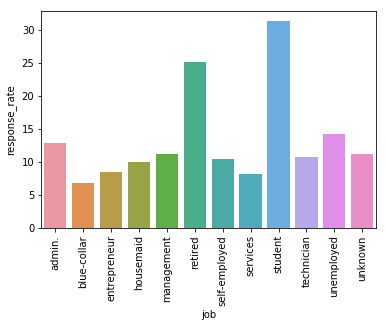

In [29]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### Marital

In [30]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.

In [31]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

In [32]:
count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')

In [33]:
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

In [34]:
agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')

In [35]:
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

In [36]:
agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


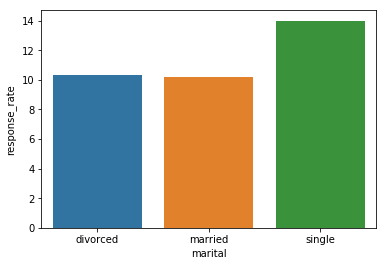

In [37]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### Education

In [38]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.

In [39]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

In [40]:
loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [41]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')

In [42]:
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

In [43]:
agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')

In [44]:
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

In [45]:
agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


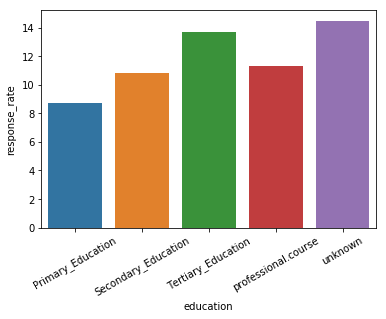

In [46]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.

#### Previous Default

In [47]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [48]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')

In [49]:
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

In [50]:
agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')

In [51]:
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

In [52]:
agg_default

,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


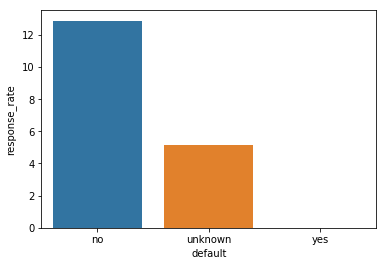

In [53]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### Housing

In [54]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [55]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')

In [56]:
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

In [57]:
agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')

In [58]:
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

In [59]:
agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


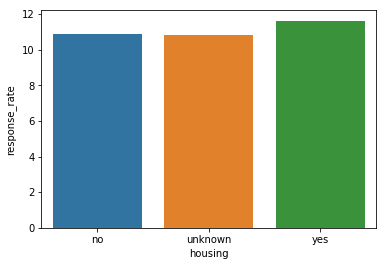

In [60]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### Loan

In [61]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [62]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')

In [63]:
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

In [64]:
agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')

In [65]:
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)

In [66]:
agg_loan

,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


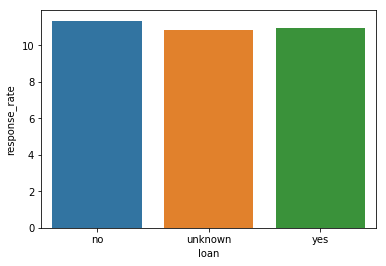

In [67]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

Now that we have had a look at the client data, we will move to the last contact information.

There are four features in the given dataset which cover this information. (Refer to the data dictionary for the same)

- Contact: contact communication type
- Month: last contact month of year
- Day_of_week: last contact day of the week
- Duration: last contact duration, in seconds 

Please note that the attribute, duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Contact

In [68]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [69]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')

In [70]:
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

In [71]:
agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')

In [72]:
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

In [73]:
agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


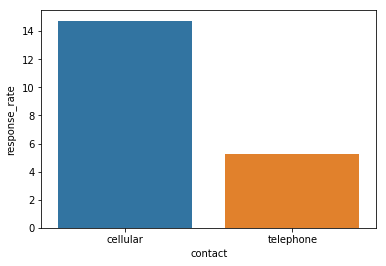

In [74]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### Month

In [75]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [76]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

In [77]:
No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

In [78]:
agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

In [79]:
agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

In [80]:
agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


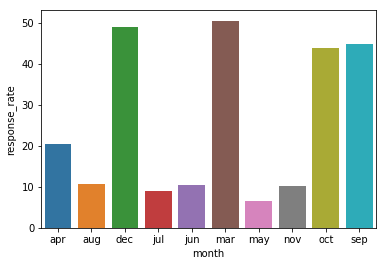

In [81]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

#### Day of the week

In [82]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [83]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

In [84]:
No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

In [85]:
agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

In [86]:
agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

In [87]:
agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


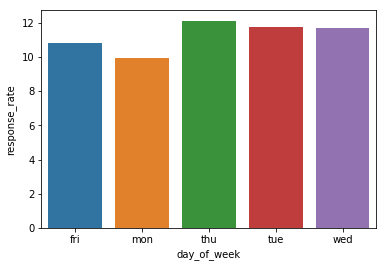

In [88]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can note that response rate is lowest on monday, while being highest on thursday. However, the gap isn't very big.

#### Duration of the call

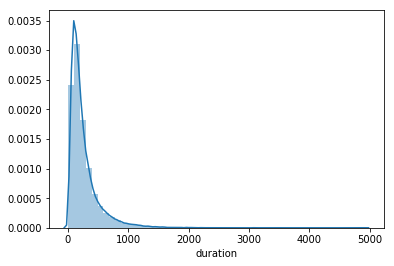

In [89]:
sns.distplot(loan['duration'])
plt.show()

As we know that this is a continuos variable, we will create a box plot

In [90]:
loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

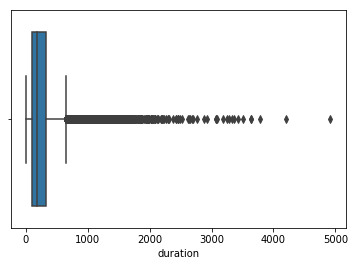

In [91]:
sns.boxplot(x='duration', data=loan)
plt.show()

Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

In [92]:
loan['duration'][loan['duration']>1271] =1271

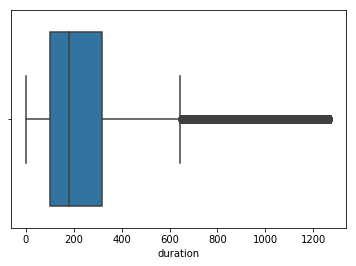

In [93]:
sns.boxplot(x='duration', data=loan)
plt.show()

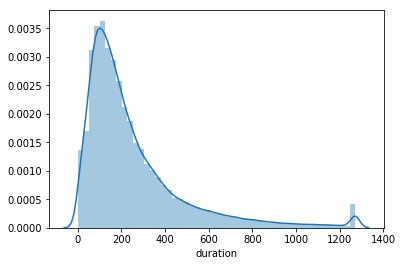

In [94]:
sns.distplot(loan['duration'])
plt.show()

Now that we have looked at client data and the data related to last contact, we will look at some of the other attributes.

- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

#### Campaign

In [95]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

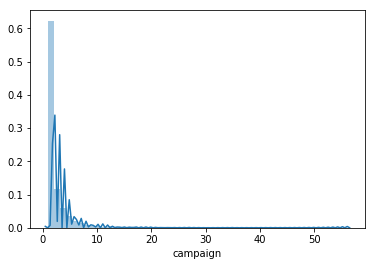

In [96]:
sns.distplot(loan['campaign'])
plt.show()

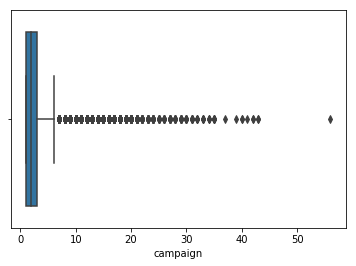

In [97]:
# We will create a box plot

sns.boxplot(x='campaign', data=loan)
plt.show()

In [98]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [99]:
loan['campaign'][loan['campaign']>14] =14

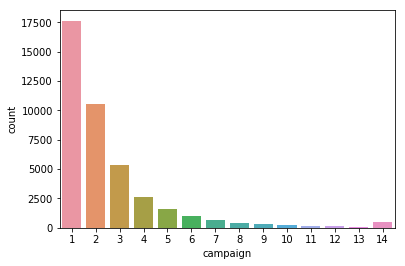

In [100]:
sns.countplot(loan['campaign'])
plt.show()

In [101]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

In [102]:
No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

In [103]:
agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

In [104]:
agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

In [105]:
agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


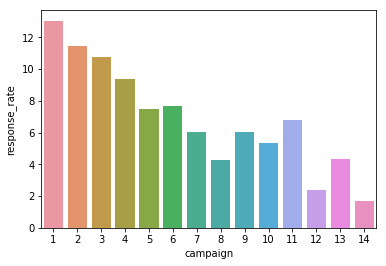

In [106]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [107]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [108]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [109]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [110]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

In [111]:
No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

In [112]:
agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

In [113]:
agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

In [114]:
agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


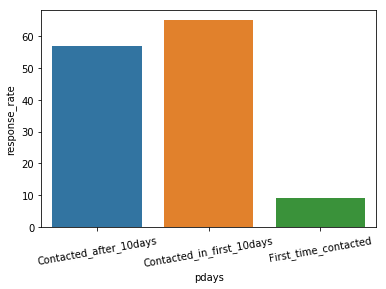

In [115]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [116]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [117]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [118]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [119]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

In [120]:
No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

In [121]:
agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

In [122]:
agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

In [123]:
agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


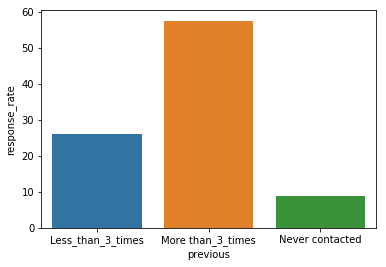

In [124]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator

In [125]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

#### Employment Variation Rate

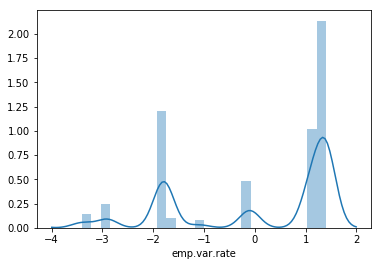

In [126]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [127]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [128]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [129]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

In [130]:
No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

In [131]:
agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

In [132]:
agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

In [133]:
agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


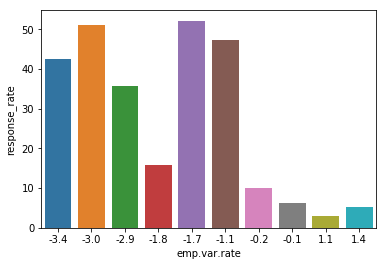

In [134]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

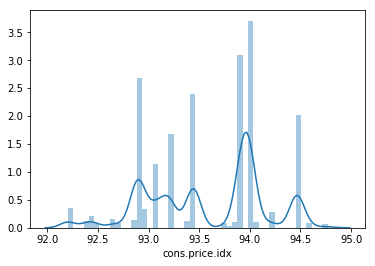

In [135]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [136]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [137]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

#### Euribor three month rate

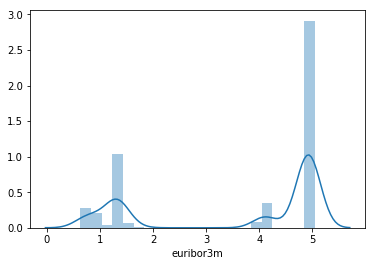

In [138]:
sns.distplot(loan['euribor3m'])
plt.show()

In [139]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

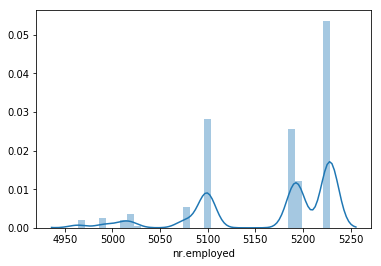

In [140]:
sns.distplot(loan['nr.employed'])
plt.show()

In [141]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [142]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Now that we have completed basic exploratory analysis, we can move to the next stage, that is data cleaning and data preparation

#### Data Preparation

Once Exploratory Data anlysis has been performed, we move to data preparation for the purpose of modelling.

In [143]:
# inspect the columns

loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'],
      dtype='object')

In [144]:
# Droping the column duration 
loan.drop(columns = ['age_bins'], inplace = True)

In [145]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [146]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 32 columns):
age                  41188 non-null int64
job                  41188 non-null object
marital              41188 non-null object
education            41188 non-null object
default              41188 non-null object
housing              41188 non-null object
loan                 41188 non-null object
contact              41188 non-null object
month                41188 non-null object
day_of_week          41188 non-null object
duration             41188 non-null int64
campaign             41188 non-null int64
pdays                41188 non-null object
previous             41188 non-null object
poutcome             41188 non-null object
emp.var.rate         41188 non-null float64
cons.price.idx       41188 non-null float64
cons.conf.idx        41188 non-null float64
euribor3m            41188 non-null float64
nr.employed          41188 non-null float64
response             41188 no

In [147]:
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


Notice that we have created a set of dummy columns for the feature job. Similarly, we are going to do the same for other categorical variables.

In [148]:
# Creating dummy variable for marital column

marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [149]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [150]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [151]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [152]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [153]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [154]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [155]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [156]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [157]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [158]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [159]:
# inspect the dataframe

loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0
4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,...,1,0,0,0,0,1,0,1,1,0


In [160]:
# Drop all features for whom dummy variable has been created

loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [161]:
loan.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,1,0,1,1,0


In [162]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [163]:
# Putting feature variable to X
X = loan.drop(['response', 'duration'],axis=1)

# Putting response variable to y
y = loan['response']

In [164]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [165]:
X_train.shape,X_test.shape

((28831, 50), (12357, 50))

In [166]:
y_train.shape,y_test.shape

((28831,), (12357,))

In [167]:
#X_train = pd.DataFrame(X_train)
#y_train= pd.DataFrame(y_train)
#Get independent columns and update dataframe
#X_train.columns=loan.drop(['response'],axis=1).columns

In [168]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,0,0,0,...,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,0,0,0,...,0,0,1,0,0,1,0,1,1,0


#### Standardisation

In [169]:
# Standardisation continuous features for X_train
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [170]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [171]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [172]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [173]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.877019,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1.084499,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.092412,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2.751789,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,...,1,1,0,-0.288564,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


In [174]:
# Standardisation continuous features for X_test
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [175]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [176]:
X_test = X_test.drop(['age', 'campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [177]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [178]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,...,1,1,0,-1.182984,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0.100062,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,...,1,1,0,-0.590809,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,...,0,0,1,-1.182984,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,...,1,1,0,1.481803,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


# Section 7: Feature Selection Using RFE

In [179]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [180]:
rfe.support_

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False])

In [181]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('job_blue-collar', False, 3),
 ('job_entrepreneur', False, 2),
 ('job_housemaid', False, 29),
 ('job_management', False, 8),
 ('job_retired', True, 1),
 ('job_self-employed', False, 19),
 ('job_services', False, 17),
 ('job_student', True, 1),
 ('job_technician', False, 26),
 ('job_unemployed', False, 25),
 ('job_unknown', False, 14),
 ('marital_married', False, 21),
 ('marital_single', False, 18),
 ('education_Secondary_Education', False, 27),
 ('education_Tertiary_Education', False, 9),
 ('education_professional.course', False, 20),
 ('education_unknown', False, 7),
 ('default_unknown', True, 1),
 ('default_yes', False, 16),
 ('housing_unknown', False, 13),
 ('housing_yes', False, 23),
 ('loan_unknown', False, 22),
 ('loan_yes', False, 31),
 ('contact_telephone', True, 1),
 ('month_aug', True, 1),
 ('month_dec', True, 1),
 ('month_jul', False, 30),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', False, 15),
 ('month

In [182]:
col = X_train.columns[rfe.support_]

In [183]:
#variables that are to be dropped
X_train.columns
col_drop = X_train.columns[~rfe.support_]
col_drop

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_Secondary_Education', 'education_Tertiary_Education',
       'education_professional.course', 'education_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'month_jul', 'month_oct', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_Contacted_in_first_10days', 'age', 'campaign',
       'cons.conf.idx', 'nr.employed'],
      dtype='object')

In [184]:
print("Before dropping the columns")
print(X_train.columns)
X_train = X_train.drop(col_drop,1)
print("After Dropping the columns")
print(X_train.columns)

Before dropping the columns
Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_Secondary_Education',
       'education_Tertiary_Education', 'education_professional.course',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pdays_Contacted_in_first_10days',
       'pdays_First_time_contacted', 'previous_More than_3_times',
       'previous_Never contacted', 'poutcome_nonexistent', 'poutcome_success',
       'age', 'campaign', 'emp.var.rate', 'cons.price.id

# Section 8: Model Building

### Model 1

In [185]:
#Assessing the model with StatsModels
import statsmodels.api as sm

# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train_sm = sm.add_constant(X_train)
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28811
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7961.9
Date:                Mon, 04 Nov 2019   Deviance:                       15924.
Time:                        23:31:28   Pearson chi2:                 2.89e+04
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4695      0.218     -6.744      0.000      -1.897      -1.042
job_retired                    0.2993      0.084      3.582      0.000       0.136       0.463
job_student                    0.3478      0.105      3.310      0.001       0.142       0.554
default_unknown               -0.3134      0.067     -4.643      0.000      -0.446      -0.181
contact_telephone             -0.5759      0.070     -8.263      0.000      -0.713      -0.439
month_aug                      0.5297      0.080      6.652      0.000       0.374       0.686
month_dec                      0.2891      0.201      1.440      0.150      -0.104       0.683
month_jun                     -0.5364      0.084     -6.421      0.000      -0.700      -0.373
month_mar                      1.3582      0.120     11.323      0.000       1.123       1.593
month_may                     -0.4707      0.065     -7.245      0.000      -0.598      -0.343
month_nov                     -0.5348      0.086     -6.213      0.000      -0.704      -0.366
month_sep                      0.2784      0.118      2.355      0.019       0.047       0.510
day_of_week_mon               -0.3264      0.054     -6.012      0.000      -0.433      -0.220
pdays_First_time_contacted    -1.0113      0.218     -4.635      0.000      -1.439      -0.584
previous_More than_3_times    -0.3152      0.283     -1.114      0.265      -0.869       0.239
previous_Never contacted       0.2438      0.033      7.294      0.000       0.178       0.309
poutcome_nonexistent           0.2438      0.033      7.294      0.000       0.178       0.309
poutcome_success               0.8535      0.220      3.876      0.000       0.422       1.285
emp.var.rate                  -2.3785      0.150    -15.873      0.000      -2.672      -2.085
cons.price.idx                 0.9701      0.057     16.986      0.000       0.858       1.082
euribor3m                      0.9937      0.125      7.962      0.000       0.749       1.238
==============================================================================================
"""

In [186]:
# Getting the predicted values on the train set
y_train_pred = res1.predict(X_train_sm)
y_train_pred[:10]


7019     0.040204
27175    0.037967
15817    0.048458
40971    0.377698
8467     0.052160
21860    0.038120
11416    0.054916
27833    0.462358
26816    0.067553
28102    0.229397
dtype: float64

In [187]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04020393, 0.03796746, 0.04845833, 0.377698  , 0.05215962,
       0.03812001, 0.05491586, 0.46235837, 0.0675531 , 0.22939672])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [188]:
y_train_pred_final = pd.DataFrame({'response':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,response,Conv_Prob,CustID
0,0,0.040204,7019
1,0,0.037967,27175
2,0,0.048458,15817
3,0,0.377698,40971
4,0,0.052160,8467


Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [189]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,response,Conv_Prob,CustID,predicted
0,0,0.040204,7019,0
1,0,0.037967,27175,0
2,0,0.048458,15817,0
3,0,0.377698,40971,0
4,0,0.052160,8467,0


In [190]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.response, y_train_pred_final.predicted )
print(confusion)

[[25181   392]
 [ 2511   747]]


In [191]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.predicted))

0.8993097707328916


#### Checking VIFs

In [192]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,previous_Never contacted,inf
15,poutcome_nonexistent,inf
17,emp.var.rate,76.33
19,euribor3m,51.42
12,pdays_First_time_contacted,15.44
18,cons.price.idx,11.59
3,contact_telephone,4.81
8,month_may,3.49
4,month_aug,2.60
6,month_jun,2.39


### Model 2

In [194]:
#Remove 'month_dec'  as it p value>0.05
X_train = X_train.drop('month_dec',1)

In [195]:
X_train.columns

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_sep', 'day_of_week_mon', 'pdays_First_time_contacted',
       'previous_More than_3_times', 'previous_Never contacted',
       'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate',
       'cons.price.idx', 'euribor3m'],
      dtype='object')

In [196]:
# Let's re-run the model using the selected variables
X_train_sm2 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28812
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7962.9
Date:                Mon, 04 Nov 2019   Deviance:                       15926.
Time:                        23:31:35   Pearson chi2:                 2.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4621      0.218     -6.713      0.000      -1.889      -1.035
job_retired                    0.3034      0.083      3.634      0.000       0.140       0.467
job_student                    0.3495      0.105      3.327      0.001       0.144       0.555
default_unknown               -0.3137      0.068     -4.644      0.000      -0.446      -0.181
contact_telephone             -0.5706      0.070     -8.194      0.000      -0.707      -0.434
month_aug                      0.5197      0.079      6.548      0.000       0.364       0.675
month_jun                     -0.5500      0.083     -6.622      0.000      -0.713      -0.387
month_mar                      1.3471      0.120     11.255      0.000       1.112       1.582
month_may                     -0.4814      0.065     -7.455      0.000      -0.608      -0.355
month_nov                     -0.5493      0.086     -6.420      0.000      -0.717      -0.382
month_sep                      0.2646      0.118      2.244      0.025       0.034       0.496
day_of_week_mon               -0.3246      0.054     -5.975      0.000      -0.431      -0.218
pdays_First_time_contacted    -1.0098      0.218     -4.627      0.000      -1.438      -0.582
previous_More than_3_times    -0.3151      0.283     -1.114      0.265      -0.869       0.239
previous_Never contacted       0.2426      0.034      7.227      0.000       0.177       0.308
poutcome_nonexistent           0.2426      0.034      7.227      0.000       0.177       0.308
poutcome_success               0.8593      0.220      3.905      0.000       0.428       1.291
emp.var.rate                  -2.3919      0.150    -15.989      0.000      -2.685      -2.099
cons.price.idx                 0.9704      0.057     16.984      0.000       0.858       1.082
euribor3m                      1.0038      0.125      8.055      0.000       0.760       1.248
==============================================================================================
"""

In [197]:
# Getting the predicted values on the train set
y_train_pred = res2.predict(X_train_sm2)
y_train_pred[:10]


7019     0.040199
27175    0.038008
15817    0.048697
40971    0.380142
8467     0.051895
21860    0.037855
11416    0.054666
27833    0.462293
26816    0.067312
28102    0.231174
dtype: float64

In [198]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04019868, 0.03800816, 0.04869719, 0.38014185, 0.05189456,
       0.03785462, 0.05466602, 0.46229329, 0.06731159, 0.23117387])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [199]:
y_train_pred_final = pd.DataFrame({'response':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,response,Conv_Prob,CustID
0,0,0.040199,7019
1,0,0.038008,27175
2,0,0.048697,15817
3,0,0.380142,40971
4,0,0.051895,8467


Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [200]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,response,Conv_Prob,CustID,predicted
0,0,0.040199,7019,0
1,0,0.038008,27175,0
2,0,0.048697,15817,0
3,0,0.380142,40971,0
4,0,0.051895,8467,0


In [201]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.response, y_train_pred_final.predicted )
print(confusion)

[[25177   396]
 [ 2508   750]]


In [202]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.predicted))

0.8992750858450973


#### Checking VIFs

In [203]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [204]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,poutcome_nonexistent,inf
13,previous_Never contacted,inf
16,emp.var.rate,75.95
18,euribor3m,51.19
11,pdays_First_time_contacted,15.36
17,cons.price.idx,11.59
3,contact_telephone,4.79
7,month_may,3.44
4,month_aug,2.59
5,month_jun,2.38


### Model 3

In [205]:
#Remove 'poutcome_nonexistent' as it p value>0.05has high VIF
X_train = X_train.drop('poutcome_nonexistent',1)

In [206]:
X_train.columns

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_sep', 'day_of_week_mon', 'pdays_First_time_contacted',
       'previous_More than_3_times', 'previous_Never contacted',
       'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [207]:
# Let's re-run the model using the selected variables
X_train_sm3 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res3 = logm2.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28812
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7962.9
Date:                Mon, 04 Nov 2019   Deviance:                       15926.
Time:                        23:31:41   Pearson chi2:                 2.89e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.4621      0.218     -6.713      0.000      -1.889      -1.035
job_retired                    0.3034      0.083      3.634      0.000       0.140       0.467
job_student                    0.3495      0.105      3.327      0.001       0.144       0.555
default_unknown               -0.3137      0.068     -4.644      0.000      -0.446      -0.181
contact_telephone             -0.5706      0.070     -8.194      0.000      -0.707      -0.434
month_aug                      0.5197      0.079      6.548      0.000       0.364       0.675
month_jun                     -0.5500      0.083     -6.622      0.000      -0.713      -0.387
month_mar                      1.3471      0.120     11.255      0.000       1.112       1.582
month_may                     -0.4814      0.065     -7.455      0.000      -0.608      -0.355
month_nov                     -0.5493      0.086     -6.420      0.000      -0.717      -0.382
month_sep                      0.2646      0.118      2.244      0.025       0.034       0.496
day_of_week_mon               -0.3246      0.054     -5.975      0.000      -0.431      -0.218
pdays_First_time_contacted    -1.0098      0.218     -4.627      0.000      -1.438      -0.582
previous_More than_3_times    -0.3151      0.283     -1.114      0.265      -0.869       0.239
previous_Never contacted       0.4852      0.067      7.227      0.000       0.354       0.617
poutcome_success               0.8593      0.220      3.905      0.000       0.428       1.291
emp.var.rate                  -2.3919      0.150    -15.989      0.000      -2.685      -2.099
cons.price.idx                 0.9704      0.057     16.984      0.000       0.858       1.082
euribor3m                      1.0038      0.125      8.055      0.000       0.760       1.248
==============================================================================================
"""

In [208]:
# Getting the predicted values on the train set
y_train_pred = res3.predict(X_train_sm3)
y_train_pred[:10]


7019     0.040199
27175    0.038008
15817    0.048697
40971    0.380142
8467     0.051895
21860    0.037855
11416    0.054666
27833    0.462293
26816    0.067312
28102    0.231174
dtype: float64

In [209]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04019868, 0.03800816, 0.04869719, 0.38014185, 0.05189456,
       0.03785462, 0.05466602, 0.46229329, 0.06731159, 0.23117387])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [210]:
y_train_pred_final = pd.DataFrame({'response':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,response,Conv_Prob,CustID
0,0,0.040199,7019
1,0,0.038008,27175
2,0,0.048697,15817
3,0,0.380142,40971
4,0,0.051895,8467


Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [211]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,response,Conv_Prob,CustID,predicted
0,0,0.040199,7019,0
1,0,0.038008,27175,0
2,0,0.048697,15817,0
3,0,0.380142,40971,0
4,0,0.051895,8467,0


In [212]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.response, y_train_pred_final.predicted )
print(confusion)

[[25177   396]
 [ 2508   750]]


In [213]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.predicted))

0.8992750858450973


#### Checking VIFs

In [214]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [215]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,emp.var.rate,75.95
17,euribor3m,51.19
11,pdays_First_time_contacted,15.36
13,previous_Never contacted,11.93
16,cons.price.idx,11.59
3,contact_telephone,4.79
7,month_may,3.44
4,month_aug,2.59
5,month_jun,2.38
8,month_nov,1.94


### Model 4

In [216]:
#Remove 'emp.var.rate' as it has high VIF
X_train = X_train.drop('emp.var.rate',1)

In [217]:
X_train.columns

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_aug', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_sep', 'day_of_week_mon', 'pdays_First_time_contacted',
       'previous_More than_3_times', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [218]:
# Let's re-run the model using the selected variables
X_train_sm4 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res4 = logm2.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28813
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8087.0
Date:                Mon, 04 Nov 2019   Deviance:                       16174.
Time:                        23:31:47   Pearson chi2:                 3.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3402      0.216     -6.213      0.000      -1.763      -0.917
job_retired                    0.4273      0.082      5.228      0.000       0.267       0.587
job_student                    0.4335      0.103      4.196      0.000       0.231       0.636
default_unknown               -0.3615      0.067     -5.378      0.000      -0.493      -0.230
contact_telephone             -0.2000      0.063     -3.182      0.001      -0.323      -0.077
month_aug                      0.0542      0.072      0.756      0.449      -0.086       0.195
month_jun                      0.0530      0.075      0.709      0.478      -0.093       0.199
month_mar                      0.8210      0.116      7.076      0.000       0.594       1.048
month_may                     -0.8779      0.059    -14.898      0.000      -0.993      -0.762
month_nov                     -0.0891      0.080     -1.119      0.263      -0.245       0.067
month_sep                      0.2510      0.118      2.122      0.034       0.019       0.483
day_of_week_mon               -0.3237      0.054     -6.035      0.000      -0.429      -0.219
pdays_First_time_contacted    -1.1986      0.216     -5.552      0.000      -1.622      -0.776
previous_More than_3_times    -0.3403      0.284     -1.199      0.230      -0.896       0.216
previous_Never contacted       0.4774      0.066      7.278      0.000       0.349       0.606
poutcome_success               0.7795      0.218      3.582      0.000       0.353       1.206
cons.price.idx                 0.1738      0.027      6.450      0.000       0.121       0.227
euribor3m                     -0.9335      0.031    -30.564      0.000      -0.993      -0.874
==============================================================================================
"""

#### Checking VIFs

In [219]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,pdays_First_time_contacted,15.09
13,previous_Never contacted,11.92
15,cons.price.idx,4.14
16,euribor3m,3.91
3,contact_telephone,3.82
7,month_may,3.27
5,month_jun,2.14
4,month_aug,2.03
8,month_nov,1.68
2,default_unknown,1.33


### Model 5

In [220]:
#Remove 'month_aug	' as it has high p alue
X_train = X_train.drop('month_aug',1)

In [221]:
X_train.columns

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_sep',
       'day_of_week_mon', 'pdays_First_time_contacted',
       'previous_More than_3_times', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [222]:
# Let's re-run the model using the selected variables
X_train_sm5 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res5 = logm2.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28814
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8087.3
Date:                Mon, 04 Nov 2019   Deviance:                       16175.
Time:                        23:31:51   Pearson chi2:                 3.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3137      0.213     -6.175      0.000      -1.731      -0.897
job_retired                    0.4296      0.082      5.262      0.000       0.270       0.590
job_student                    0.4364      0.103      4.230      0.000       0.234       0.639
default_unknown               -0.3631      0.067     -5.404      0.000      -0.495      -0.231
contact_telephone             -0.2008      0.063     -3.196      0.001      -0.324      -0.078
month_jun                      0.0420      0.073      0.574      0.566      -0.101       0.186
month_mar                      0.8080      0.115      7.045      0.000       0.583       1.033
month_may                     -0.8924      0.056    -16.040      0.000      -1.001      -0.783
month_nov                     -0.1086      0.075     -1.444      0.149      -0.256       0.039
month_sep                      0.2409      0.118      2.050      0.040       0.011       0.471
day_of_week_mon               -0.3243      0.054     -6.048      0.000      -0.429      -0.219
pdays_First_time_contacted    -1.2075      0.215     -5.603      0.000      -1.630      -0.785
previous_More than_3_times    -0.3257      0.283     -1.150      0.250      -0.881       0.229
previous_Never contacted       0.4761      0.066      7.265      0.000       0.348       0.605
poutcome_success               0.7763      0.217      3.570      0.000       0.350       1.203
cons.price.idx                 0.1674      0.026      6.537      0.000       0.117       0.218
euribor3m                     -0.9263      0.029    -31.880      0.000      -0.983      -0.869
==============================================================================================
"""

#### Checking VIFs

In [223]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,pdays_First_time_contacted,13.80
12,previous_Never contacted,11.92
3,contact_telephone,3.82
14,cons.price.idx,3.34
15,euribor3m,3.19
6,month_may,2.96
4,month_jun,2.13
7,month_nov,1.36
2,default_unknown,1.33
9,day_of_week_mon,1.26


### Model 6

In [224]:
#Remove 'month_jun' as it has high P value
X_train = X_train.drop('month_jun',1)

In [225]:
X_train.columns

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_mar', 'month_may', 'month_nov', 'month_sep', 'day_of_week_mon',
       'pdays_First_time_contacted', 'previous_More than_3_times',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [226]:
# Let's re-run the model using the selected variables
X_train_sm6 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial())
res6 = logm2.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28815
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8087.5
Date:                Mon, 04 Nov 2019   Deviance:                       16175.
Time:                        23:31:54   Pearson chi2:                 3.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3104      0.213     -6.162      0.000      -1.727      -0.894
job_retired                    0.4270      0.082      5.237      0.000       0.267       0.587
job_student                    0.4352      0.103      4.218      0.000       0.233       0.637
default_unknown               -0.3628      0.067     -5.400      0.000      -0.495      -0.231
contact_telephone             -0.1889      0.059     -3.190      0.001      -0.305      -0.073
month_mar                      0.8000      0.114      7.027      0.000       0.577       1.023
month_may                     -0.9019      0.053    -16.991      0.000      -1.006      -0.798
month_nov                     -0.1147      0.074     -1.539      0.124      -0.261       0.031
month_sep                      0.2310      0.116      1.987      0.047       0.003       0.459
day_of_week_mon               -0.3240      0.054     -6.043      0.000      -0.429      -0.219
pdays_First_time_contacted    -1.2052      0.215     -5.593      0.000      -1.627      -0.783
previous_More than_3_times    -0.3291      0.283     -1.162      0.245      -0.884       0.226
previous_Never contacted       0.4767      0.066      7.273      0.000       0.348       0.605
poutcome_success               0.7789      0.217      3.582      0.000       0.353       1.205
cons.price.idx                 0.1702      0.025      6.768      0.000       0.121       0.219
euribor3m                     -0.9286      0.029    -32.286      0.000      -0.985      -0.872
==============================================================================================
"""

#### Checking VIFs

In [227]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,pdays_First_time_contacted,13.39
11,previous_Never contacted,11.92
3,contact_telephone,3.21
13,cons.price.idx,3.00
14,euribor3m,2.76
5,month_may,2.22
6,month_nov,1.35
2,default_unknown,1.33
8,day_of_week_mon,1.26
12,poutcome_success,1.21


### Model 7

In [228]:
#Remove 'month_nov' as it has high P value
X_train = X_train.drop('month_nov',1)

In [229]:
X_train.columns

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_mar', 'month_may', 'month_sep', 'day_of_week_mon',
       'pdays_First_time_contacted', 'previous_More than_3_times',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [230]:
# Let's re-run the model using the selected variables
X_train_sm7 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial())
res7 = logm2.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28816
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8088.7
Date:                Mon, 04 Nov 2019   Deviance:                       16177.
Time:                        23:31:57   Pearson chi2:                 3.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3444      0.212     -6.356      0.000      -1.759      -0.930
job_retired                    0.4290      0.082      5.260      0.000       0.269       0.589
job_student                    0.4372      0.103      4.236      0.000       0.235       0.640
default_unknown               -0.3564      0.067     -5.314      0.000      -0.488      -0.225
contact_telephone             -0.1857      0.059     -3.136      0.002      -0.302      -0.070
month_mar                      0.8138      0.114      7.168      0.000       0.591       1.036
month_may                     -0.8866      0.052    -16.987      0.000      -0.989      -0.784
month_sep                      0.2419      0.116      2.085      0.037       0.015       0.469
day_of_week_mon               -0.3237      0.054     -6.034      0.000      -0.429      -0.219
pdays_First_time_contacted    -1.1970      0.215     -5.559      0.000      -1.619      -0.775
previous_More than_3_times    -0.3495      0.283     -1.236      0.216      -0.904       0.205
previous_Never contacted       0.4843      0.065      7.419      0.000       0.356       0.612
poutcome_success               0.7863      0.217      3.618      0.000       0.360       1.212
cons.price.idx                 0.1770      0.025      7.154      0.000       0.129       0.225
euribor3m                     -0.9369      0.028    -33.165      0.000      -0.992      -0.882
==============================================================================================
"""

#### Checking VIFs

In [231]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,pdays_First_time_contacted,12.51
10,previous_Never contacted,11.72
3,contact_telephone,3.18
12,cons.price.idx,2.71
13,euribor3m,2.62
5,month_may,2.09
2,default_unknown,1.33
7,day_of_week_mon,1.26
11,poutcome_success,1.18
6,month_sep,1.09


### Model 8

In [232]:
#Remove 'previous_More than_3_times' as it has high p value
X_train = X_train.drop('previous_More than_3_times',1)

In [233]:
X_train.columns

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_mar', 'month_may', 'month_sep', 'day_of_week_mon',
       'pdays_First_time_contacted', 'previous_Never contacted',
       'poutcome_success', 'cons.price.idx', 'euribor3m'],
      dtype='object')

In [234]:
# Let's re-run the model using the selected variables
X_train_sm8 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial())
res8 = logm2.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28817
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8089.4
Date:                Mon, 04 Nov 2019   Deviance:                       16179.
Time:                        23:31:59   Pearson chi2:                 3.09e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.3929      0.208     -6.692      0.000      -1.801      -0.985
job_retired                    0.4290      0.082      5.263      0.000       0.269       0.589
job_student                    0.4323      0.103      4.187      0.000       0.230       0.635
default_unknown               -0.3555      0.067     -5.303      0.000      -0.487      -0.224
contact_telephone             -0.1832      0.059     -3.096      0.002      -0.299      -0.067
month_mar                      0.8142      0.114      7.173      0.000       0.592       1.037
month_may                     -0.8867      0.052    -16.990      0.000      -0.989      -0.784
month_sep                      0.2383      0.116      2.053      0.040       0.011       0.466
day_of_week_mon               -0.3236      0.054     -6.032      0.000      -0.429      -0.218
pdays_First_time_contacted    -1.1503      0.212     -5.418      0.000      -1.566      -0.734
previous_Never contacted       0.4854      0.065      7.436      0.000       0.357       0.613
poutcome_success               0.8221      0.216      3.809      0.000       0.399       1.245
cons.price.idx                 0.1732      0.025      7.057      0.000       0.125       0.221
euribor3m                     -0.9349      0.028    -33.150      0.000      -0.990      -0.880
==============================================================================================
"""

#### Checking VIFs

In [235]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,pdays_First_time_contacted,12.51
9,previous_Never contacted,11.72
3,contact_telephone,3.18
11,cons.price.idx,2.67
12,euribor3m,2.60
5,month_may,2.09
2,default_unknown,1.33
7,day_of_week_mon,1.26
10,poutcome_success,1.16
6,month_sep,1.09


### Model 9

In [236]:
#Remove 'pdays_First_time_contacted' as it has high VIF value
X_train = X_train.drop('pdays_First_time_contacted',1)

In [237]:
X_train.columns

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_mar', 'month_may', 'month_sep', 'day_of_week_mon',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [238]:
# Let's re-run the model using the selected variables
X_train_sm9 = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm9, family = sm.families.Binomial())
res9 = logm2.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28818
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8103.7
Date:                Mon, 04 Nov 2019   Deviance:                       16207.
Time:                        23:32:02   Pearson chi2:                 3.10e+04
No. Iterations:                     6   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.4689      0.065    -37.845      0.000      -2.597      -2.341
job_retired                  0.4313      0.081      5.299      0.000       0.272       0.591
job_student                  0.4625      0.103      4.507      0.000       0.261       0.664
default_unknown             -0.3582      0.067     -5.346      0.000      -0.489      -0.227
contact_telephone           -0.1872      0.059     -3.164      0.002      -0.303      -0.071
month_mar                    0.8167      0.113      7.217      0.000       0.595       1.038
month_may                   -0.8965      0.052    -17.196      0.000      -0.999      -0.794
month_sep                    0.2427      0.116      2.096      0.036       0.016       0.470
day_of_week_mon             -0.3235      0.054     -6.035      0.000      -0.429      -0.218
previous_Never contacted     0.4127      0.063      6.563      0.000       0.289       0.536
poutcome_success             1.8911      0.090     21.046      0.000       1.715       2.067
cons.price.idx               0.1823      0.024      7.452      0.000       0.134       0.230
euribor3m                   -0.9426      0.028    -33.505      0.000      -0.998      -0.887
============================================================================================
"""

#### Checking VIFs

In [239]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,contact_telephone,3.13
10,cons.price.idx,2.63
11,euribor3m,2.51
8,previous_Never contacted,2.47
5,month_may,2.06
2,default_unknown,1.31
7,day_of_week_mon,1.24
9,poutcome_success,1.14
6,month_sep,1.09
0,job_retired,1.07


##### Variables selected are as below
1	contact_telephone
2	cons.price.idx	
3	euribor3m	
4	previous_Never contacted
5	month_may
6	default_unknown
7	day_of_week_mon
8	poutcome_success
9	month_sep
10	job_retired	
11	month_mar
12	job_student

#### We can consider this model 9 as final model as we have good VIF values and low p-values for variables

In [240]:
# Getting the predicted values on the train set
y_train_pred = res9.predict(X_train_sm9)
y_train_pred[:10]


7019     0.024543
27175    0.070392
15817    0.047402
40971    0.350860
8467     0.066637
21860    0.039661
11416    0.063498
27833    0.402282
26816    0.081409
28102    0.258840
dtype: float64

In [241]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02454348, 0.07039173, 0.04740177, 0.35085968, 0.06663735,
       0.03966089, 0.06349843, 0.40228221, 0.08140913, 0.25883961])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [242]:
y_train_pred_final = pd.DataFrame({'response':y_train.values, 'conv_Prob':y_train_pred})
y_train_pred_final['prospectID'] = y_train.index
y_train_pred_final.head()

,response,conv_Prob,prospectID
0,0,0.024543,7019
1,0,0.070392,27175
2,0,0.047402,15817
3,0,0.350860,40971
4,0,0.066637,8467


Creating new column 'predicted' with 1 if Conv_Prob > 0.5 else 0

In [243]:
y_train_pred_final['predicted'] = y_train_pred_final.conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,response,conv_Prob,prospectID,predicted
0,0,0.024543,7019,0
1,0,0.070392,27175,0
2,0,0.047402,15817,0
3,0,0.350860,40971,0
4,0,0.066637,8467,0


In [244]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.response, y_train_pred_final.predicted )
print(confusion)

[[25273   300]
 [ 2589   669]]


In [245]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.predicted))

0.8997953591620131


#### Metrics beyond simply accuracy

In [246]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [247]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.20534069981583794

In [248]:
# Let us calculate specificity
TN / float(TN+FP)

0.9882688773315607

In [249]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.01173112266843937


In [250]:
# positive predictive value 
print (TP / float(TP+FP))

0.6904024767801857


In [251]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9070777402914364


### Section 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [252]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [253]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.response, 
                                         y_train_pred_final.conv_Prob, drop_intermediate = False )

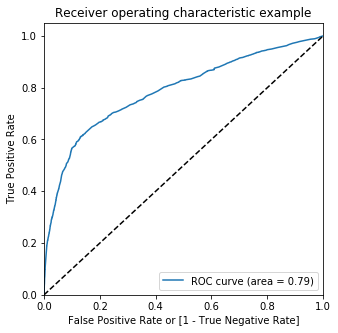

In [254]:
draw_roc(y_train_pred_final.response, y_train_pred_final.conv_Prob)

### Section 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [255]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(10)

,response,conv_Prob,prospectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.024543,7019,0,1,0,0,0,0,0,0,0,0,0
1,0,0.070392,27175,0,1,0,0,0,0,0,0,0,0,0
2,0,0.047402,15817,0,1,0,0,0,0,0,0,0,0,0
3,0,0.350860,40971,0,1,1,1,1,0,0,0,0,0,0
4,0,0.066637,8467,0,1,0,0,0,0,0,0,0,0,0
5,0,0.039661,21860,0,1,0,0,0,0,0,0,0,0,0
6,0,0.063498,11416,0,1,0,0,0,0,0,0,0,0,0
7,1,0.402282,27833,0,1,1,1,1,1,0,0,0,0,0
8,0,0.081409,26816,0,1,0,0,0,0,0,0,0,0,0
9,0,0.258840,28102,0,1,1,1,0,0,0,0,0,0,0


In [256]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.response, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.113003  1.000000  0.000000
0.1   0.1  0.782248  0.668508  0.796739
0.2   0.2  0.852312  0.581031  0.886873
0.3   0.3  0.889737  0.387047  0.953779
0.4   0.4  0.897229  0.266728  0.977554
0.5   0.5  0.899795  0.205341  0.988269
0.6   0.6  0.898789  0.165132  0.992257
0.7   0.7  0.894974  0.100675  0.996168
0.8   0.8  0.889425  0.027010  0.999296
0.9   0.9  0.887205  0.002455  0.999922


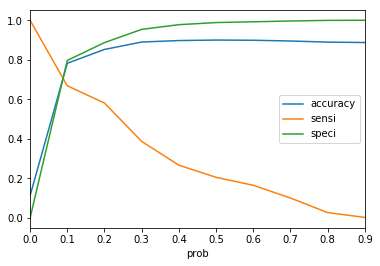

In [257]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 10% as the optimum point to take it as a cutoff probability.

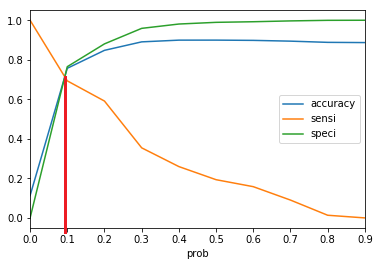

In [258]:
y_train_pred_final['final_predicted'] = y_train_pred_final.conv_Prob.map( lambda x: 1 if x > 0.10 else 0)

y_train_pred_final.head()

,response,conv_Prob,prospectID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.024543,7019,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.070392,27175,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.047402,15817,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.350860,40971,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.066637,8467,0,1,0,0,0,0,0,0,0,0,0,0


In [259]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.response, y_train_pred_final.final_predicted)

0.7822482744268322

In [260]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.response, y_train_pred_final.final_predicted )
confusion2

array([[20375,  5198],
       [ 1080,  2178]], dtype=int64)

In [261]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [262]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6685082872928176

In [263]:
# Let us calculate specificity
TN / float(TN+FP)

0.7967387478981739

In [264]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20326125210182613


In [265]:
# Positive predictive value 
print (TP / float(TP+FP))

0.2952819956616052


In [266]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9496620834304358


## Precision and Recall

##### Precision
TP / TP + FP

In [267]:
#Looking at the confusion matrix again
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.2952819956616052

##### Recall
TP / TP + FN

In [268]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.6685082872928176

##### We can also use Using sklearn utilities to get precision & Recall

In [269]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.response, y_train_pred_final.final_predicted)

0.2952819956616052

In [270]:
recall_score(y_train_pred_final.response, y_train_pred_final.final_predicted)

0.6685082872928176

#### Precision and recall tradeoff

In [271]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.response, y_train_pred_final.final_predicted

(0        0
 1        0
 2        0
 3        0
 4        0
 5        0
 6        0
 7        1
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       1
 16       1
 17       0
 18       0
 19       1
 20       0
 21       0
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
         ..
 28801    0
 28802    0
 28803    1
 28804    1
 28805    0
 28806    0
 28807    0
 28808    1
 28809    0
 28810    0
 28811    0
 28812    0
 28813    0
 28814    0
 28815    0
 28816    0
 28817    0
 28818    0
 28819    0
 28820    1
 28821    0
 28822    1
 28823    0
 28824    0
 28825    0
 28826    0
 28827    0
 28828    0
 28829    0
 28830    0
 Name: response, Length: 28831, dtype: int64, 0        0
 1        0
 2        0
 3        1
 4        0
 5        0
 6        0
 7        1
 8        0
 9        1
 10       1
 11       0
 12       0
 13       0
 14       0
 15       1
 16       1
 17       0
 18    

In [272]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.response, y_train_pred_final.conv_Prob)

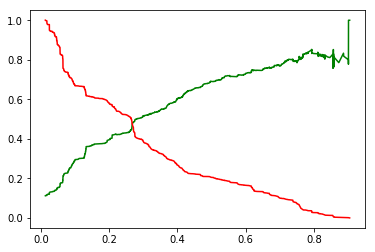

In [273]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Section 11: Model Evaluation-Making predictions on the test set

In [274]:
X_train.columns

Index(['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_mar', 'month_may', 'month_sep', 'day_of_week_mon',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m'],
      dtype='object')

In [275]:
#Retrieving the columns in test set as those that are considered in training set.
X_test = X_test[['job_retired', 'job_student', 'default_unknown', 'contact_telephone',
       'month_mar', 'month_may', 'month_sep', 'day_of_week_mon',
       'previous_Never contacted', 'poutcome_success', 'cons.price.idx',
       'euribor3m']]
X_test.head()

,job_retired,job_student,default_unknown,contact_telephone,month_mar,month_may,month_sep,day_of_week_mon,previous_Never contacted,poutcome_success,cons.price.idx,euribor3m
33148,0,0,0,0,0,1,0,0,1,0,-1.172918,-1.348603
27585,0,0,0,0,0,0,0,0,1,0,-0.644728,0.226981
15722,0,0,0,0,0,0,0,1,1,0,0.590583,0.768913
40349,0,0,0,0,0,0,0,0,0,1,0.778116,-1.574841
2576,0,0,0,1,0,1,0,0,1,0,0.721340,0.708890


In [276]:
#Adding constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,job_retired,job_student,default_unknown,contact_telephone,month_mar,month_may,month_sep,day_of_week_mon,previous_Never contacted,poutcome_success,cons.price.idx,euribor3m
33148,1.0,0,0,0,0,0,1,0,0,1,0,-1.172918,-1.348603
27585,1.0,0,0,0,0,0,0,0,0,1,0,-0.644728,0.226981
15722,1.0,0,0,0,0,0,0,0,1,1,0,0.590583,0.768913
40349,1.0,0,0,0,0,0,0,0,0,0,1,0.778116,-1.574841
2576,1.0,0,0,0,1,0,1,0,0,1,0,0.721340,0.708890


Making predictions on the test set

In [277]:
# Getting the predicted values on the test set
y_test_pred = res9.predict(X_test_sm)
y_test_pred[:10]

33148    0.130643
27585    0.084116
15722    0.047570
40349    0.740490
2576     0.024683
33359    0.130643
26890    0.081839
8032     0.049229
13180    0.064500
10102    0.063692
dtype: float64

In [278]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [279]:
# Let's see the head
y_pred_1.head()

,0
33148,0.130643
27585,0.084116
15722,0.047570
40349,0.740490
2576,0.024683


In [280]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [281]:
# Putting custID to index
y_test_df['prospectID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [282]:
# Appending y_test_df and y_pred_1
y_pred_final= pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,response,prospectID,0
0,0,33148,0.130643
1,0,27585,0.084116
2,0,15722,0.047570
3,1,40349,0.740490
4,0,2576,0.024683


In [283]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'predicted_probability', 'response':'actual_response'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['prospectID','actual_response','predicted_probability'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,prospectID,actual_response,predicted_probability
0,33148,0,0.130643
1,27585,0,0.084116
2,15722,0,0.047570
3,40349,1,0.740490
4,2576,0,0.024683


In [284]:
y_pred_final['predicted_response'] = y_pred_final.predicted_probability.map(lambda x: 1 if x > 0.10 else 0)
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['prospectID','actual_response', 'predicted_response', 'predicted_probability'], axis=1)
y_pred_final.head()

,prospectID,actual_response,predicted_response,predicted_probability
0,33148,0,1,0.130643
1,27585,0,0,0.084116
2,15722,0,0,0.047570
3,40349,1,1,0.740490
4,2576,0,0,0.024683


In [285]:
loan2= loan['duration']
loan2.head()

0    261
1    149
2    226
3    151
4    307
Name: duration, dtype: int64

In [286]:
loan2 = pd.DataFrame(loan2)

In [287]:
loan2 = loan2.rename_axis(columns="prospectID")
loan2.head()

prospectID,duration
0,261
1,149
2,226
3,151
4,307


In [288]:
y_pred_final = pd.merge(pd.DataFrame(y_pred_final), pd.DataFrame(loan2), left_on=['prospectID'], 
             right_on= ['prospectID'], how='left', right_index=True)
y_pred_final.head(10)

,prospectID,actual_response,predicted_response,predicted_probability,duration
0,33148,0,1,0.130643,52
1,27585,0,0,0.084116,407
2,15722,0,0,0.047570,177
3,40349,1,1,0.740490,187
4,2576,0,0,0.024683,165
5,33359,1,1,0.130643,725
6,26890,0,0,0.081839,75
7,8032,0,0,0.049229,29
8,13180,0,0,0.064500,272
9,10102,0,0,0.063692,139


For my info: Here we are merging DF's by using index column which is 'prospetID' in this case.
If 'right_index=True' is not used we will get error. So make sure to include this in this kind on scenarios.

In [289]:
y_pred_final['cost_of_call'] = (0.033*y_pred_final['duration']) + 0.8
y_pred_final.head()

,prospectID,actual_response,predicted_response,predicted_probability,duration,cost_of_call
0,33148,0,1,0.130643,52,2.516
1,27585,0,0,0.084116,407,14.231
2,15722,0,0,0.047570,177,6.641
3,40349,1,1,0.740490,187,6.971
4,2576,0,0,0.024683,165,6.245


In [290]:
#Sorting in descending order based on 'predicted_probability'
y_pred_final = y_pred_final.sort_values(by=['predicted_probability'], ascending=False)
y_pred_final.head()

,prospectID,actual_response,predicted_response,predicted_probability,duration,cost_of_call
3643,39147,1,1,0.905003,313,11.129
11268,39153,1,1,0.905003,363,12.779
4903,39378,1,1,0.903241,277,9.941
8918,39227,1,1,0.902429,700,23.900
10369,40731,1,1,0.860592,396,13.868


In [291]:
decile_df = y_pred_final[['actual_response', 'predicted_response', 'predicted_probability']]
decile_df.head()

,actual_response,predicted_response,predicted_probability
3643,1,1,0.905003
11268,1,1,0.905003
4903,1,1,0.903241
8918,1,1,0.902429
10369,1,1,0.860592


In [292]:
decile_df['decile'] = pd.qcut(decile_df['predicted_probability'], 10, labels=np.arange(10, 0, -1))

In [293]:
lift_df = decile_df.groupby('decile')['predicted_probability'].count().reset_index()

In [294]:
lift_df.rename({'predicted_probability':'total'}, axis=1, inplace=True)

In [295]:
lift_df_pred = decile_df[decile_df['actual_response']==1].groupby('decile')['actual_response'].count().reset_index()

In [296]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
decile    10 non-null category
total     10 non-null int64
dtypes: category(1), int64(1)
memory usage: 570.0 bytes


In [297]:
lift_df_final = lift_df.merge(lift_df_pred,on = 'decile')

In [298]:
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [299]:
lift_df_final['cumresp'] = lift_df_final['actual_response'].cumsum()

In [300]:
lift_df_final['gain'] = 100*(lift_df_final['cumresp']/sum(lift_df_final['actual_response']))

In [301]:
lift_df_final['cumlift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [302]:
lift_df_final

,decile,total,actual_response,cumresp,gain,cumlift
9,1,1235,587,587,42.474674,4.247467
8,2,1195,247,834,60.347323,3.017366
7,3,1269,114,948,68.596237,2.286541
6,4,1242,65,1013,73.299566,1.832489
5,5,1203,89,1102,79.739508,1.594790
4,6,1174,48,1150,83.212735,1.386879
3,7,1298,80,1230,89.001447,1.271449
2,8,1248,83,1313,95.007236,1.187590
1,9,1251,33,1346,97.395080,1.082168
0,10,1242,36,1382,100.000000,1.000000


In [303]:
#Total calls to get 80% of customers
(len(y_pred_final) * 0.6)

7414.2

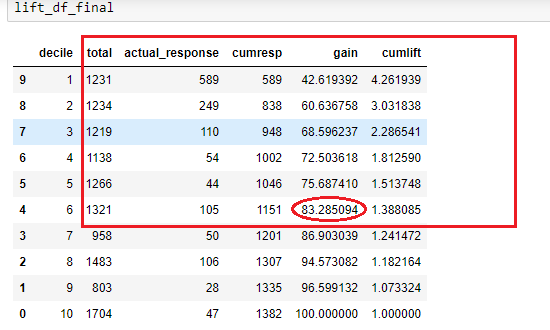

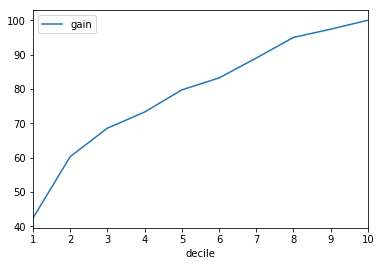

In [304]:
lift_df_final.plot.line(x='decile', y=['gain'])

83% gain is provided at 6th decile. If you market to only the top 6 deciles (60% of the customers), you will capture more than 80% of the responders.
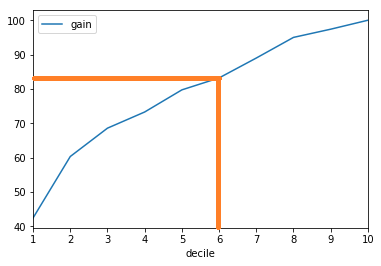

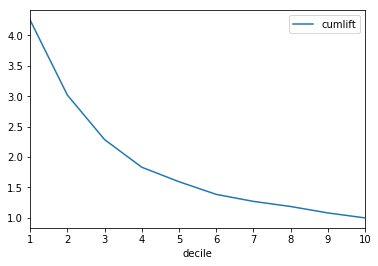

In [305]:
lift_df_final.plot.line(x='decile', y=['cumlift'])

In [306]:
(len(y_pred_final) * 0.6)

7414.2

Lift at 6th decile is 1.5. Our original response rate is about 11.26%. Response rate we can get by targetting 60% prospects using the model is 1.5*11.26 = 16.89
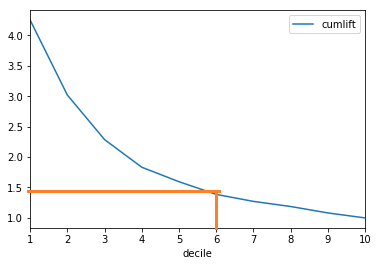

In [307]:
import math 
target_prospects = y_pred_final.head(7409)
target_prospects.shape

(7409, 6)

In [308]:
target_prospects.head()

,prospectID,actual_response,predicted_response,predicted_probability,duration,cost_of_call
3643,39147,1,1,0.905003,313,11.129
11268,39153,1,1,0.905003,363,12.779
4903,39378,1,1,0.903241,277,9.941
8918,39227,1,1,0.902429,700,23.900
10369,40731,1,1,0.860592,396,13.868


In [309]:
# Average call duration
target_prospects['duration'].mean()

254.88594952085302

In [310]:
# Average cost_of_call
target_prospects['cost_of_call'].mean()

9.211236334188188